# Ein einfaches Anwendungsbeispiel
Dieses Jupyter-Notebook beschreibt in Kürze die Anwendung der Programmbibliothek DWA-a102, welche auf dem Merkblatt M102 Teil 4 aufbaut. Zunächst werden die relevanten Importe aufgerufen:

In [1]:
# Imports
# import dwa-a102 libraries
from dwa_a102 import StudyArea as StudyArea
from dwa_a102 import watbal, plot_watbal

Dann legen wir ein Untersuchungsgebiet an und ergänzen Flächen (eine größere versiegelte Flächen und Dachflächen). Die Wasserbilanz wird für beide Flächen zusammengefasst):

In [2]:
site = StudyArea(p=700, etp=575)

sealed_square = site.flat_area(area=2000)
roof = site.roof(area=4000, sp=0.3)

print(watbal(sealed_square,roof))

     Element  Area      a    g      v    Vp    Va Vg   Vv
0  Flat area  2000  0.818  0.0  0.182  1400  1145  0  255
1       Roof  4000  0.903  0.0  0.097  2800  2527  0  273
2     System  6000  0.874  0.0  0.126  4200  3672  0  528


Man erkennt, dass die Aufteilungsfaktoren für Abfaluss (a) besonders hoch sind und die Verdunstung nur sehr geringe Werte annimmt (v). Die Grundwasser spielt praktisch keine Rolle bei ausschließlicher Versiegelung. Wir können das System modifizieren, indem wir die versiegelte Fläche stark verkleinern und einen Großteil in Grünflächen umwandeln:

In [3]:
sealed_square_1 = site.flat_area(area=500)
sealed_square_2 = site.garden(area=1500,a=0.2,v=0.6,g=0.2)
print(watbal(roof,sealed_square_1,sealed_square_2))


               Element  Area      a     g      v    Vp    Va   Vg   Vv
0                 Roof  4000  0.903  0.00  0.097  2800  2527    0  273
1            Flat area   500  0.818  0.00  0.182   350   286    0   64
2  Garden / green area  1500  0.200  0.20  0.600  1050   210  210  630
3               System  6000  0.720  0.05  0.230  4200  3023  210  967


Dardurch verschiebt sich für das gesamte System der Wasserhaushalt in Richtung geringerer Aufteilungswerte für den Abfluss. Wenn wir anstelle von Standarddächern dünschichtige Gründachaufbauten vorsehen, können wir die Wasserbilanz weiter modifizieren:

In [4]:
green_roof = site.green_roof_shallow(2000)
print(watbal(green_roof,sealed_square_1,sealed_square_2))

               Element  Area      a      g      v    Vp    Va   Vg    Vv
0   Green roof shallow  2000  0.602  0.000  0.398  1400   843    0   557
1            Flat area   500  0.818  0.000  0.182   350   286    0    64
2  Garden / green area  1500  0.200  0.200  0.600  1050   210  210   630
3               System  4000  0.478  0.075  0.447  2800  1339  210  1251


Somit kann der Abfluss auf unter 50% reduziert werden. Wir können nun noch eine Versickerungsmulde für das Dach und die versiegelte Fläche anlegen und ausrechnen lassen, welche Grundfläche diese haben müsste:

In [5]:
swale = site.infilt_swale(700, green_roof,sealed_square_1)
print(watbal(swale,sealed_square_2))

               Element  Area      a      g      v    Vp   Va    Vg    Vv
0   Green roof shallow  2000  0.602      0  0.398  1400    0     0   557
1            Flat area   500  0.818      0  0.182   350    0     0    64
2        Infilt. swale    87  0.002  0.974  0.024    61    2  1159    29
3  Garden / green area  1500  0.200    0.2  0.600  1050  210   210   630
4               System  4087  0.074  0.479  0.447  2861  212  1369  1280


Wegen der immer noch hohen Werte (a), hätte die Mulde eine Fläche 87 Quadratmetern. Der Wasserhaushalt teilt sich aber nun praktisch auf Grundwasserneubildung und Verdunstung auf. Gegenüber dem Referenzzustand (das wäre die Grünfläche) ist die Grundwasserneubildung vermutlich zu hoch. Dies könnte man z.B. durch extensive Gründächer noch erreichen. Außerdem lässt sich das Gesamtergebnis auch grafisch darstellen:

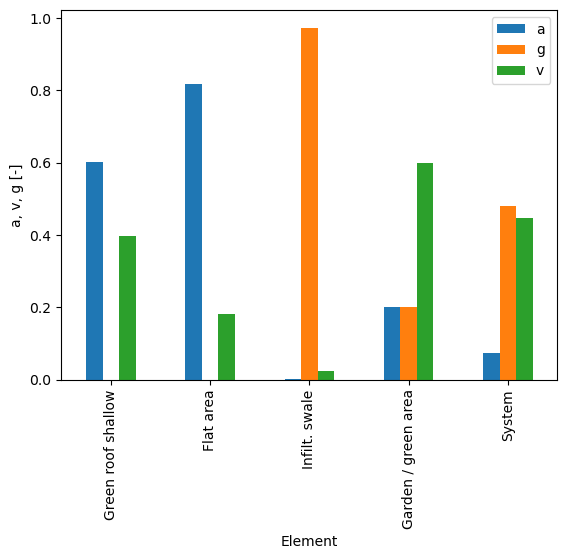

In [6]:
plot_watbal(swale,sealed_square_2)